In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

from datetime import datetime

In [5]:
# 경로 변수 (고정)


trainfile = '../_data/train_03_997.csv'
old_trainfile = '../_data/train.csv'
kaggle_trainfile = '../_data/train_k.csv'

testfile = '../_data/test_clean.csv'
old_testfile = '../_data/test.csv'

train_171016 = '../_data/171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = '../_data/train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = '../_data/train_700789_dropped_cooks__circle_filter.csv'
train_700789_all_vars_cdcf_kmeans = '../_data/train_kmeans_30_added.csv'
train_700419_all_vars_cdcf150kmh_km60 = '../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv'

train_700419_all_vars_4d_clust120 = '../_data/train_kmeans_4D_120.csv'
train_700419_all_vars_4d_clust120_speed = '../_data/train_kmeans_4D_120_clustspeed.csv'
train_700419_all_vars_4d_clust120_speed_glob = '../_data/train_kmeans_4D_120_clustspeed_globalized.csv'

train_700419 = '../_data/train_700419_recent_2047.csv'
train_697355 = '../_data/train_697355_rsq_0722.csv'
train_697349 = '../_data/train_697349_rsq_0723.csv'
train_697284 = '../_data/train_697284_rsq_0725.csv'
train_696688 = '../_data/train_696688_rsq_0731.csv'

trains = [train_700419, train_697355, train_697349, train_697284, train_696688]

train_latest = trains[0]

In [3]:
pd.options.display.max_columns = 40

load dfs

In [6]:
df_trains = list(map(lambda t: pd.read_csv(t), trains))
df_trains[0].head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [8]:
avg_zero = 503.51274886482713

In [7]:
for df_t in df_trains[1:]:
    try:
        del df_t['didnt_move']
    except:
        continue

df_trains[2].head()

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,trip_clust_120,new_clust_spd,clust_spd,clust_spd120,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,38,11,17,22.351081,22.351081,22.452301,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,11,20,14,26.168973,26.168973,20.823821,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,9,2,14,24.123125,24.123125,20.823821,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,5,34,81,15.370883,15.370883,13.819989,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,9,50,25,13.602766,13.602766,13.197215,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [9]:
# df of results
df_res = pd.read_csv('../_data/OLS_result_variables_unique_with_restr_171024_1507.csv')
df_res = df_res.tail()
df_res

,formula,desc,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
8,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, clust_spd with means, log time,...",700419.0,0.701208,45660.575994,0.0,757875.481676,758299.480734,3.446769e+06,0.0,0.516736,13.818326,106.364487
9,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697355.0,0.722529,51883.673856,0.0,680320.051067,680732.432863,1.051437e+06,0.0,0.608973,8.890892,107.983126
10,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697349.0,0.723376,52103.264707,0.0,678258.040967,678670.422453,9.006055e+05,0.0,0.577827,8.446077,107.996783
11,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697284.0,0.725532,52663.908834,0.0,672780.197744,673192.575874,7.351040e+05,0.0,0.526259,7.918734,108.034106
12,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",696688.0,0.731000,54093.312934,0.0,649597.340000,650009.687347,3.894761e+05,0.0,0.382307,6.582222,108.378739


In [10]:
df_res.iloc[1, 0]

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [48]:
df_res.to_csv('../_data/OLS_five_candidates_171024_1554.csv', index=False)

In [49]:
df_res

,formula,desc,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
8,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move),"log dur, hr^3, clust_spd with means, log time, didnt_move",700419.0,0.701208,45660.575994,0.0,757875.481676,758299.480734,3.446769e+06,0.0,0.516736,13.818326,106.364487
9,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=100, dur>=900 / spd>100, dur<=20",697355.0,0.722529,51883.673856,0.0,680320.051067,680732.432863,1.051437e+06,0.0,0.608973,8.890892,107.983126
10,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=50, dur>=600 / spd>100, dur<=20",697349.0,0.723376,52103.264707,0.0,678258.040967,678670.422453,9.006055e+05,0.0,0.577827,8.446077,107.996783
11,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=50, dur>=300 / spd>100, dur<=20",697284.0,0.725532,52663.908834,0.0,672780.197744,673192.575874,7.351040e+05,0.0,0.526259,7.918734,108.034106
12,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / spd<0.3 / spd>100, dur<=20",696688.0,0.731000,54093.312934,0.0,649597.340000,650009.687347,3.894761e+05,0.0,0.382307,6.582222,108.378739


In [14]:
for idx in range(1, 5):
    df_res.iloc[idx, 0] = df_res.iloc[idx, 0][:-16]
    print(df_res.iloc[idx, 0])

np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)
np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)
np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)
np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)


In [58]:
mod = sm.OLS.from_formula(df_res.iloc[0, 0], data=df_trains[0])
print('m')

m


In [20]:
df_train0 = df_trains[0]

In [21]:
df_train0.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [16]:
fmlas = list()

for idx in range(len(df_trains)):
    print(idx, end=' ')
    fmlas.append(df_res.iloc[idx, 0])

print()
print(fmlas)

0 1 2 3 4 
['np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)

In [17]:
fmlas[1]

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

In [73]:
df_train0.iloc[180591:180592, :]

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,trip_clust_120,new_clust_spd,clust_spd,clust_spd120,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
180591,0.0,False,0,331,Thursday,23,95,21,34,81,14.525242,14.525242,13.819989,0.012972,1,False,False,False,False,-73.985512,40.747231,-73.996773,40.75367,16.572073,1509.9,196.5,73,49,0.0,0.0,0.0,16.7,0.65,10.0,9.3,0.0,0.0,328


In [101]:
df_trains[2].iloc[476415:476418, :]

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,trip_clust_120,new_clust_spd,clust_spd,clust_spd120,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
476415,0.0,False,0,211,Thursday,0,72,0,14,29,30.122947,30.122947,29.411498,0.063185,1,False,False,False,False,-73.973671,40.762844,-73.942207,40.817638,26.476981,9745.0,523.2,31,18,0.00,0.0,0.0,-0.6,0.52,-9.4,11.1,31.5,0.0,1325
476416,0.0,False,0,210,Wednesday,23,71,23,28,107,29.502788,29.502788,27.948854,0.086569,4,False,False,False,False,-74.010849,40.708778,-73.977829,40.788803,29.076681,11097.6,980.6,39,31,0.01,0.0,0.0,0.0,0.52,-8.9,5.6,0.0,0.0,1374
476417,0.0,False,0,210,Wednesday,23,71,7,14,42,20.578681,20.578681,18.325904,0.008405,1,False,False,False,False,-73.959152,40.809479,-73.954178,40.816254,25.229268,862.0,66.5,39,31,0.01,0.0,0.0,0.0,0.52,-8.9,5.6,0.0,0.0,123


In [18]:
def get_date_rowrange(df, d1, d2):
    top = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[0, :].name
    bot = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[-1, :].name
    return top, bot

def get_month_rowranges(df):
    month_ranges = dict()

    months = [101, 201, 301, 401]

    for idx, month in enumerate(months):
        month_ranges[idx+1] = get_date_rowrange(df, month, month+100)
#         top = df[(df['m_d'] >= month)
#                        &(df['m_d'] < month+100)].iloc[0, :].name
#         bot = df[(df['m_d'] >= month)
#                        &(df['m_d'] < month+100)].iloc[-1, :].name
#         month_ranges[idx+1] = (top, bot)
    
    return month_ranges

print(get_date_rowrange(df_trains[2], 115, 211))
get_month_rowranges(df_trains[0])


(476416, 622350)


{1: (535649, 700418), 2: (364370, 535648), 3: (180591, 364369), 4: (0, 180590)}

In [107]:
month_ranges = get_month_rowranges(df_train0)
(month_ranges[3][0], month_ranges[1][1])

(180591, 700418)

In [144]:
(700419-519828) / 700419

0.257832811502829

In [142]:
get_date_rowrange(df_trains[0], 101, 401)[1] - get_date_rowrange(df_trains[0], 101, 401)[0] + 1

519828

In [ ]:
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)

In [22]:
import random

def train_test_date_samples(X, y, train_size=None,\
                            test_size=None,\
                            train_range=(101, 401),
                            test_range=(401, 501)):
    train_start, train_end = get_date_rowrange(X, *train_range)
    test_start, test_end = get_date_rowrange(X, *test_range)

    train_cnt = train_end - train_start + 1
    test_cnt = test_end - test_start + 1
    
    if not train_size or train_size > train_cnt:
        train_size = train_cnt
    if not test_size or test_size > test_cnt:
        test_size = test_cnt
    
    train_indices = random.sample(range(train_start, train_end+1),\
                                  k=train_size)
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)
    
    print("test / (train + test) = {}".format(test_size / (train_size + test_size)))
        
    return X.loc[train_indices, :], X.loc[test_indices, :],\
           y.loc[train_indices], y.loc[test_indices]

    

X, y = df_train0.iloc[:, :-1], df_train0.iloc[:, -1]
    
a, b, c, d = train_test_date_samples(X, y)


test / (train + test) = 0.257832811502829


In [31]:
import random

def train_test_date_samples2(X, y, X0, y0, train_size=None,\
                            test_size=None,\
                            train_range=(101, 401),
                            test_range=(401, 501)):
    train_start, train_end = get_date_rowrange(X, *train_range)
    test_start, test_end = get_date_rowrange(X0, *test_range)

    train_cnt = train_end - train_start + 1
    test_cnt = test_end - test_start + 1
    
    if not train_size or train_size > train_cnt:
        train_size = train_cnt
    if not test_size or test_size > test_cnt:
        test_size = test_cnt
    
    train_indices = random.sample(range(train_start, train_end+1),\
                                  k=train_size)
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)
    
    print("test_size: {}\ntrain_size: {}".format(test_size, train_size))
    print("test / (train + test) = {}".format(test_size / (train_size + test_size)))
        
    return X.loc[train_indices, :], X0.loc[test_indices, :],\
           y.loc[train_indices], y0.loc[test_indices]

    

X, y = df_train0.iloc[:, :-1], df_train0.iloc[:, -1]
    
a, b, c, d = train_test_date_samples2(X, y, X, y)


test_size: 180591
train_size: 519828
test / (train + test) = 0.257832811502829


In [28]:
import re

for i, fmla in enumerate(fmlas):
    fmlas[i] = re.sub(r'new_clust_spd', r'clust_spd', fmla)
    
print(fmlas)

['np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)', 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(

In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

t00 = datetime.now()
print(t00)

n = 3

df0 = df_trains[0]
scores_all = list()
avg_zero = 503.51274886482713

for idx in range(len(df_trains)):
    t0 = datetime.now()
    print(t0)
    
    fmla = fmlas[idx]
    df = df_trains[idx]
    scores = np.zeros(n)
    
    print("Train has {} rows".format(df.shape[0]))
    print("Test has {} rows".format(df0.shape[0]))
    print("formula = {}\n".format(fmla))
    
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_date_samples2(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                    df0.iloc[:, :-1], df0.iloc[:, -1],\
                                                                    train_size = 200000,\
                                                                    test_size = 50000)
        df_train = pd.concat([X_train, y_train], axis=1)

        print("trial {}".format(i+1))
        model_train = sm.OLS.from_formula(fmla, data=df_train)
        res_train = model_train.fit()

        y_pred = res_train.predict(X_test)
        
        y_pred = np.exp(y_pred)
        
        # replace zero-dist points with mean of zero-dist points
        X_test.loc[:, 'dur'] = y_pred
        X_test.loc[X_test['total_dist'] == 0, 'dur'] = avg_zero
        y_pred = X_test.loc[:, 'dur']

        try:
            scores[i] = mean_squared_log_error(y_test, y_pred)
            print(pd.concat([y_test, y_pred], axis=1).head(5))
            print(np.sqrt(scores))
        except:
            print("except")
            print(y_test[y_test<=0].shape)
            print(y_pred[y_pred<=0].shape)
            break

    scores = np.sqrt(scores)
    print(scores)
    scores_all.append(scores)
    
    t1 = datetime.now()
    print(t1)
    print(t1 - t0)
    print()
    print()

    
t2 = datetime.now()
print(t2)
print(t2 - t00)

2017-10-25 09:16:52.677277
2017-10-25 09:16:52.678280
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)

test_size: 50000
train_size: 200000
test / (train + test) = 0.2
trial 1
           dur          dur
28849    365.0   481.413671
108153   958.0  1062.820090
66432    431.0   788.235016
110464  2113.0  1717.511524
59630    298.0   388.567813
[ 0.42872717  0.          0.        ]
test_size: 50000
train_size: 200000
test / (train + test) = 0.2
trial 2
           dur         dur
47870    512.0  389.749898
139145  1380.0  844.412973
25964    166.0  277.385913
39109    235.0  370.995171
35469    301.0  582.552619
[ 0.42872717  0.42859444  0.        ]
test_size: 50000
train_size: 200000
test / (train + test) = 0.2
trial 3
          dur         

In [34]:
scores_all

[array([ 0.42872717,  0.42859444,  0.42771184]),
 array([ 0.4342924 ,  0.42918264,  0.42784607]),
 array([ 0.42611698,  0.43098262,  0.42676215]),
 array([ 0.42718617,  0.42332475,  0.42586166]),
 array([ 0.42727466,  0.42695558,  0.42665227])]

In [40]:
[np.nanmean(i) for i in scores_all]

[0.42834448447476725,
 0.43044036785378942,
 0.42795391989512827,
 0.42545752545551924,
 0.42696083898555776]

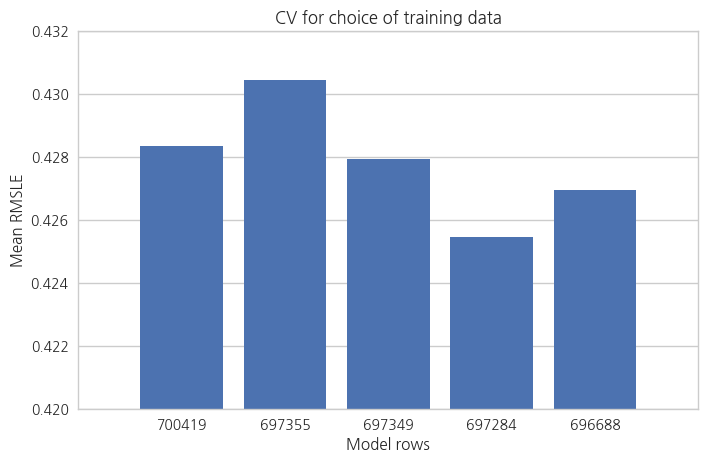

In [58]:

plt.bar(list(range(1, len(scores_all)+1)), [np.nanmean(i) for i in scores_all])
plt.xlim(0, len(scores_all)+1)
plt.ylim(0.420, 0.432)
plt.gca().xaxis.grid(False)


plt.xticks(np.arange(len(scores_all))+1, ['700419', '697355', '697349', '697284', '696688'])
plt.ylabel("Mean RMSLE")
plt.xlabel("Model rows")
plt.title("CV for choice of training data")
plt.show()



In [36]:
res_list = list()

for idx in len(df_trains):
    print(idx, end=' ')
    mod = sm.OLS.from_formula(df_res.iloc[idx, 0], data=df_trains[idx])
    res_list.append(mod)

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'